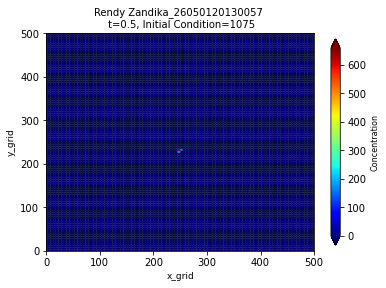

running timestep ke:1 dari:214(0.47X)


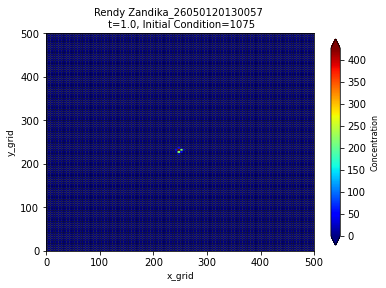

running timestep ke:2 dari:214(0.93X)


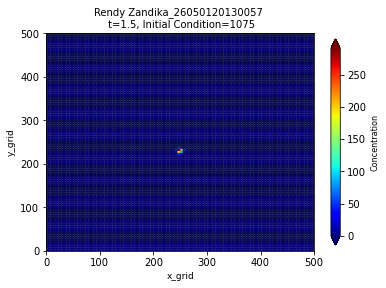

running timestep ke:3 dari:214(1.4X)


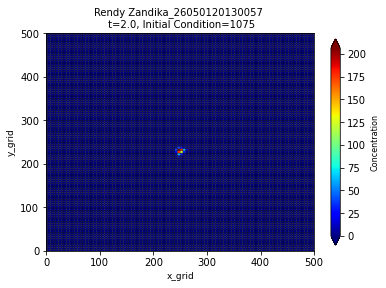

running timestep ke:4 dari:214(1.87X)


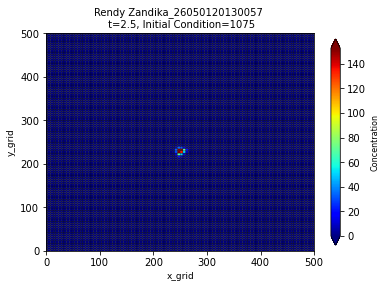

running timestep ke:5 dari:214(2.34X)


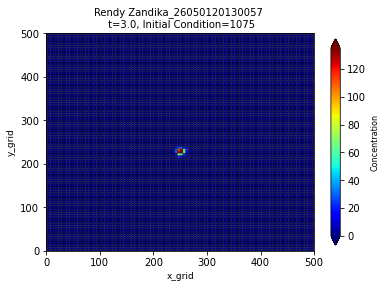

running timestep ke:6 dari:214(2.8X)


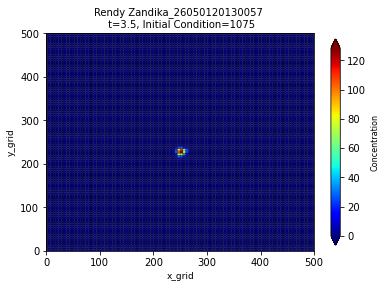

running timestep ke:7 dari:214(3.27X)


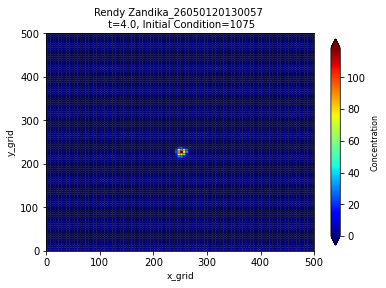

running timestep ke:8 dari:214(3.74X)


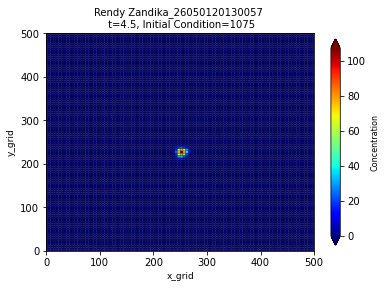

running timestep ke:9 dari:214(4.21X)


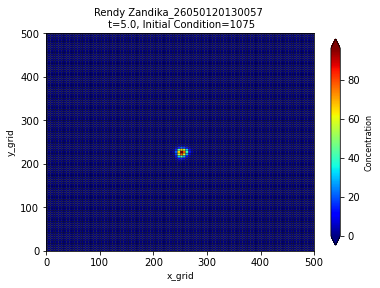

running timestep ke:10 dari:214(4.67X)


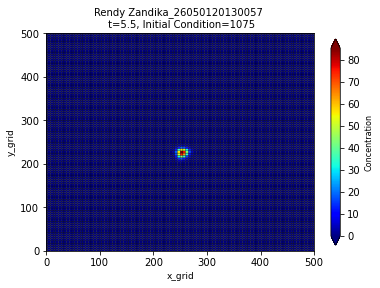

running timestep ke:11 dari:214(5.14X)


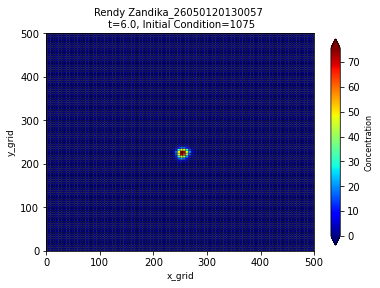

running timestep ke:12 dari:214(5.61X)


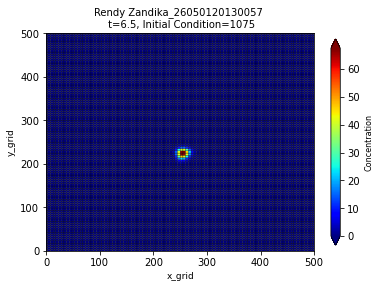

running timestep ke:13 dari:214(6.07X)


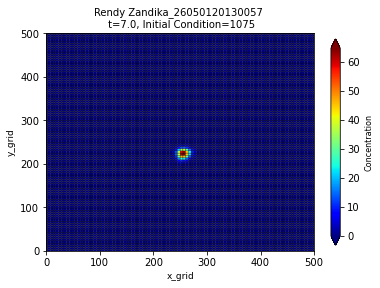

running timestep ke:14 dari:214(6.54X)


KeyboardInterrupt: 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
 
def percentage(part, whole):
        percentage = 100 * float(part)/float(whole)
        return str(round(percentage,2)) + "X"

#Memasukkan Parameter Awal
C = 1.75    #Kecepatan Aliran
ad = 1.75   #KoSefisien Difusi
#Arah Arus (Berdasarkan Geographic Convention)
theta = 135  #Skenario I 
#Parameter Lanjutan
q = 0.95    #Kriteria Kestabilan
x = 500     #Jumlah Grid Horizontal (x)
y = 500     #Jumlah Grid Vertikal (y)
dx = 5      
dy = 5
Tend = 107   #Lama Simulasi
#Tend = 1
dt = 0.5
#Polutan
px = 250   #Polutan pada grid x
py = 237   #Polutan pada grid y
Ic = 1075   #Jumlah Polutan
#Perhitungan U dan V ()
u = C * np.sin(theta*np.pi/180)
v = C * np.cos(theta*np.pi/180)
dt_count = 1/((abs(u)/(q*dx))+(abs(v)/(q*dy))+(2*ad/(q*dx*2))+(2*ad/(q*dy*2)))

Nx = int(x/dx)      #number of mesh in x direction
Ny = int(y/dy)      #number of mesh in y direction
Nt = int(Tend/dt)   #number of timesteps
#Perhitungan Titik Polutan di Buang
px1 = int(px/dx)
py1 = int(py/dy)

#Fungsi disederhanakan
lx = u*dt/dx
ly = v*dt/dy
ax = ad*dt/dx**2
ay = ad*dt/dy**2
cfl = (2*ax + 2*ay + abs(lx) + abs(ly))     #Syarat Kestabilan CFL
#Perhitungan CFL
if cfl >= q:
    print('CFL Violated, Please use dt :'+str(round(dt_count,4)))
    sys.exit()
#%%
#Pembuatan Grid
x_grid = np.linspace(0-dx, x+dx, Nx+2)      #Ghostnode pada boundary
y_grid = np.linspace(0-dx, y+dy, Ny+2)      #Ghostnode pada boundary
t = np.linspace(0, Tend, Nt+1)
x_mesh,y_mesh = np.meshgrid(x_grid,y_grid)
F = np.zeros((Nt+1, Ny+2, Nx+2))
#Kondisi Awal(Initial Condition)
F[0,py1,px1] = Ic
#%%
#Iterasi
for n in range (0, Nt):
    for i in range (1,Ny+1):
        for j in range(1,Nx+1):
            F[n+1,i,j]=((F[n,i,j]*(1-abs(lx)-abs(ly)))  + \
                        (0.5*(F[n,i-1,j]*(ly+abs(ly)))) + \
                        (0.5*(F[n,i+1,j]*(abs(ly)-ly))) + \
                        (0.5*(F[n,i,j-1]*(lx+abs(lx)))) + \
                        (0.5*(F[n,i,j+1]*(abs(lx)-lx))) + \
                        (ay*(F[n,i+1,j]-2*(F[n,i,j])+F[n,i-1,j])) + \
                        (ax*(F[n,i,j+1]-2*(F[n,i,j])+F[n,i,j-1]))) #Diskritisasi
    #Syarat Batas (Dirichlet Boundary Condition)
    F[n+1,0,:] = 0 #BC Bawah
    F[n+1,:,0] = 0 #BC Kiri
    F[n+1,Ny+1,:] = 0 #BC Atas
    F[n+1,:,Nx+1] = 0 #BC Kanan

#Output Gambar
    plt.clf()
    plt.pcolor(x_mesh, y_mesh, F[n+1,:,:],cmap = 'jet',shading ='auto',edgecolors = 'k')
    cbar = plt.colorbar(orientation = 'vertical', shrink = 0.95, extend = 'both')
    cbar.set_label(label='Concentration', size = 8)
    #plt.clim(0,100)
    plt.title('Rendy Zandika_26050120130057 \n t='+str(round(dt*(n+1),3))+', Initial Condition='+str(Ic),fontsize=10)
    plt.xlabel('x_grid',fontsize=9)
    plt.ylabel('y_grid',fontsize=9)
    plt.axis([0, x, 0, y])
    #plt.pause(0.01)
    plt.savefig(str(n+1)+'.jpg', dpi = 300)
    plt.pause(0.01)
    plt.close()
    print('running timestep ke:' +str(n+1) + ' dari:' +str(Nt) + '('+ percentage(n+1,Nt)+')')
    #print('Nilai CFL:' +str(cfl) + ' dengan arah:' +str(theta))

In [6]:
print (cfl)

0.37905444566227675


In [3]:
print (u)

1.6903701960058695


In [4]:
print (v)

0.4529333289294113


In [ ]:
print (u)